## Практическое задание
Дьяченко Даниил @daniilstv

https://geekbrains.ru/lessons/60318/homework

### Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Простая линейная регрессия

Линейная регрессия - это метод прогнозирования, которому уже более 200 лет.  
Простая линейная регрессия - это отличный первый алгоритм машинного обучения для самостоятельной реализации, поскольку он быстро настраивается и достаточно прост для понимания.  
В этом уроке вы узнаете, как реализовать простой алгоритм линейной регрессии с нуля в Python. 

После завершения этого урока вы узнаете:  
- Как реализовать линейную регрессию "с нуля" на Python.  
- Как найти оптимальные коэффициенты линейной регрессии.  
- Как делать прогнозы и оценить работу модели.  

Давайте начнем!

In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

Линейная регрессия предполагает линейную зависимость между входными переменными (X) и целевой переменной (y).  
Это означает, что выход (y) может быть вычислен как **линейная комбинация** входных переменных (X).  
Если Х состоит из одной переменной, то линейная регрессия называется простой.  
В простой линейной регрессии мы можем использовать статистику обучающих данных для оценки коэффициентов, требуемых моделью для прогнозирования новых данных.  
Уравнение простой линейной регрессии может быть записано как:
$$y = w_0 + w_1 × X$$  
Как видите, это простое уравнение прямой, известное нам еще со школы.  
w0 и w1 - это коэффициенты, которые мы должны найти.  
w0 называется смещением или bias и отвечает за смещение регрессионной прямой по оси y относительно начала координат.  
w1 - это коэффициент при признаке Х, он отвечает за угол наклона прямой.  
Как только коэффициенты известны, мы можем использовать это уравнение для оценки целевой переменной (y), на новых данных (X_test).  
Когда признаков больше чем один, уравнение линейной регрессии принимает следующий вид:  
$$y = w_0 + \sum_{i=1}^m w_i x_i$$  
Если мы добавим фиктивный признак x0 = 1, тогда уравнение можно переписать чуть более компактно, убрав w0 под знак суммы:
$$y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$$. 
Так же его можно записать в мтаричном виде:  
$$\vec y = X \vec w + \epsilon$$  
ϵ – непрогнозируемая ошибка модели  

Непрогнозируемая ошибка складывается из:
- Смещение (Bias) – средняя ошибка по всевозможным наборам данных (показывает, насколько модель отличается от "идеальной")
- Дисперсия (Var) – вариативность ошибки (то, на сколько ошибка будет отличаться, если обучать модель на разных данных).  
Показывает, насколько утойчива модель.
- неустранимой ошибки: σ

![bias_var.png](bias_var.png)

Сгенерируем простой пример для наглядности:

In [555]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]]).T

In [556]:
X  # <- матрица "объекты-признаки" ([x0, x1])

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [557]:
X[:,1]

array([ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2])

In [558]:
X.shape

(10, 2)

In [559]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Построим модель линейной регрессии!

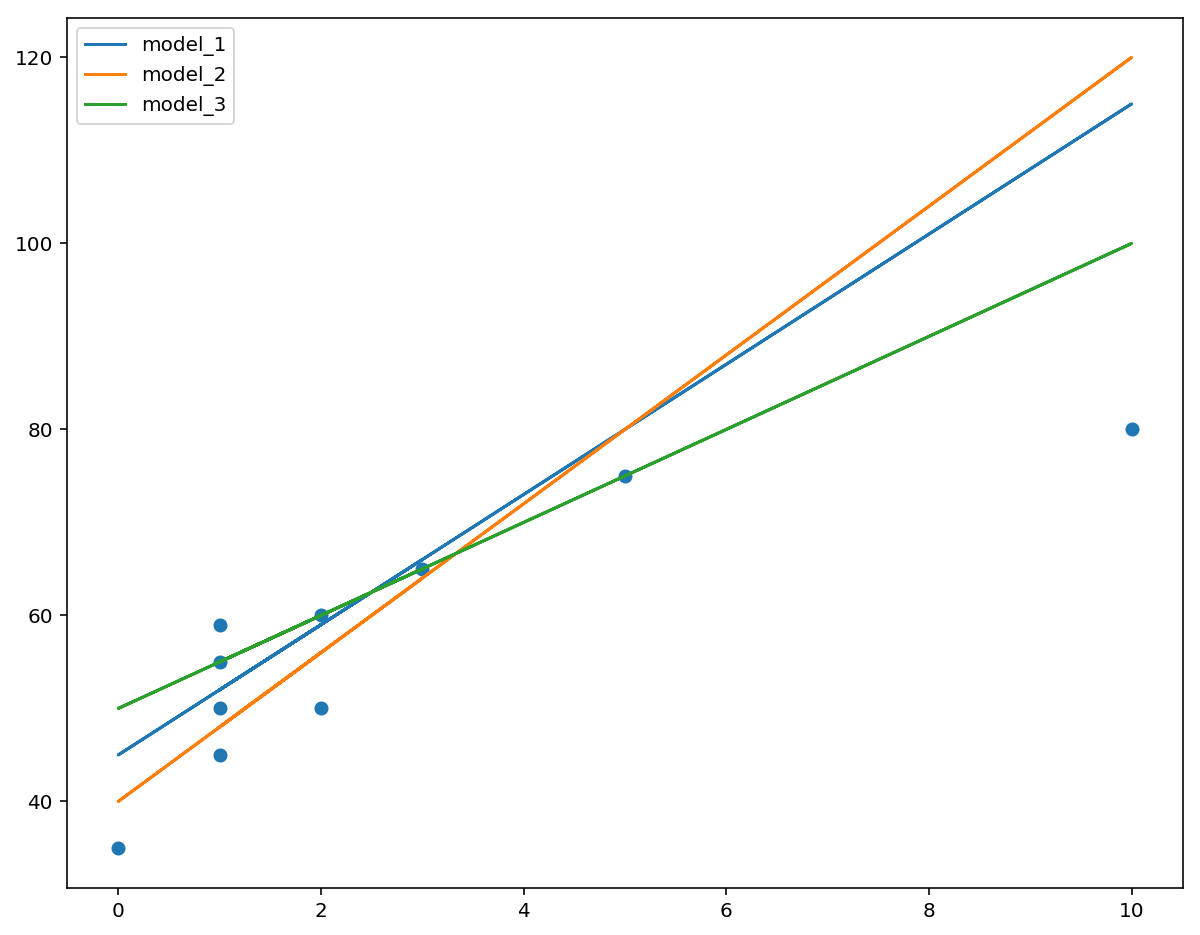

In [560]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], 50*np.ones(10) + X[:,1]*5, label='model_3')
plt.legend();

Сделаем прогноз значений y на обучающих данных:

In [561]:
y_pred1 = 45*np.ones(10) + X[:,1]*7
y_pred2 = 40*np.ones(10) + X[:,1]*8
y_pred3 = 50*np.ones(10) + X[:,1]*4

In [562]:
y_pred1

array([ 52.,  52.,  59.,  52.,  66.,  45.,  80., 115.,  52.,  59.])

In [563]:
y_pred2

array([ 48.,  48.,  56.,  48.,  64.,  40.,  80., 120.,  48.,  56.])

In [564]:
y_pred3

array([54., 54., 58., 54., 62., 50., 70., 90., 54., 58.])

In [565]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Как мы можем оценить работу модели?

1. Разность прогнозов

In [566]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err3 = np.sum(y - y_pred3)
print(f'Разность прогнозов наших моделей: {err1}, {err2}, {err3}')

Разность прогнозов наших моделей: -58.0, -34.0, -30.0


2. Средняя абсолютная ошибка (MAE)

In [567]:
mae_1 = np.sum(np.abs(y - y_pred1))/len(y)
mae_2 = np.sum(np.abs(y - y_pred2))/len(y)
mae_3 = np.sum(np.abs(y - y_pred3))/len(y)
print(f'MAE наших моделей: {mae_1}, {mae_2}, {mae_3}')

MAE наших моделей: 8.0, 8.4, 6.2


In [568]:
def calc_mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

3. Среднеквадратичная ошибка (MSE)

In [569]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_3 = np.mean((y - y_pred3)**2)
print(f'MSE наших моделей: {mse_1}, {mse_2}, {mse_3}')

MSE наших моделей: 154.4, 188.6, 55.0


In [570]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

4. RMSE

In [571]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
rmse_3 = np.sqrt(np.mean((y - y_pred3)**2))
print(f'MSE наших моделей: {rmse_1}, {rmse_2}, {rmse_3}')

MSE наших моделей: 12.425779653607254, 13.733171520082315, 7.416198487095663


5. Коэффициент детерминации (R2)

In [572]:
# предлагаю реализовать самим :)
def calc_r2(y, y_pred):
    SStot = sum((y - np.mean(y))**2) 
    SSreg = sum((y_pred - np.mean(y))**2) 
    SSres = sum((y - y_pred)**2) 
    r2 = 1 - SSres / SStot
    return r2

In [573]:
print(calc_r2(y, y_pred1), calc_r2(y, y_pred2), calc_r2(y, y_pred3))

0.0689821514712976 -0.13724071394114823 0.6683550410033767


In [574]:
# проверка
print(r2_score(y, y_pred1), r2_score(y, y_pred2), r2_score(y, y_pred3))

0.0689821514712976 -0.13724071394114823 0.6683550410033767


### Методы поиска оптимальных параметров

1. **Метод наименьших квадратов (МНК)**   
Суть метода: минимизируем среднеквадратичную ошибку (MSE) между реальным значением целевой переменной и прогнозом, выданным моделью.   
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$  

Для этого необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно w  
$$\large\mathcal{L}{\partial \vec{w}} = 0$$
$$\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$  

Реализуем этот метод! (но для этого придется перемножить пару матриц О_о)  
Для тех, кто подзабыл как это делается: http://matrixmultiplication.xyz

In [575]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


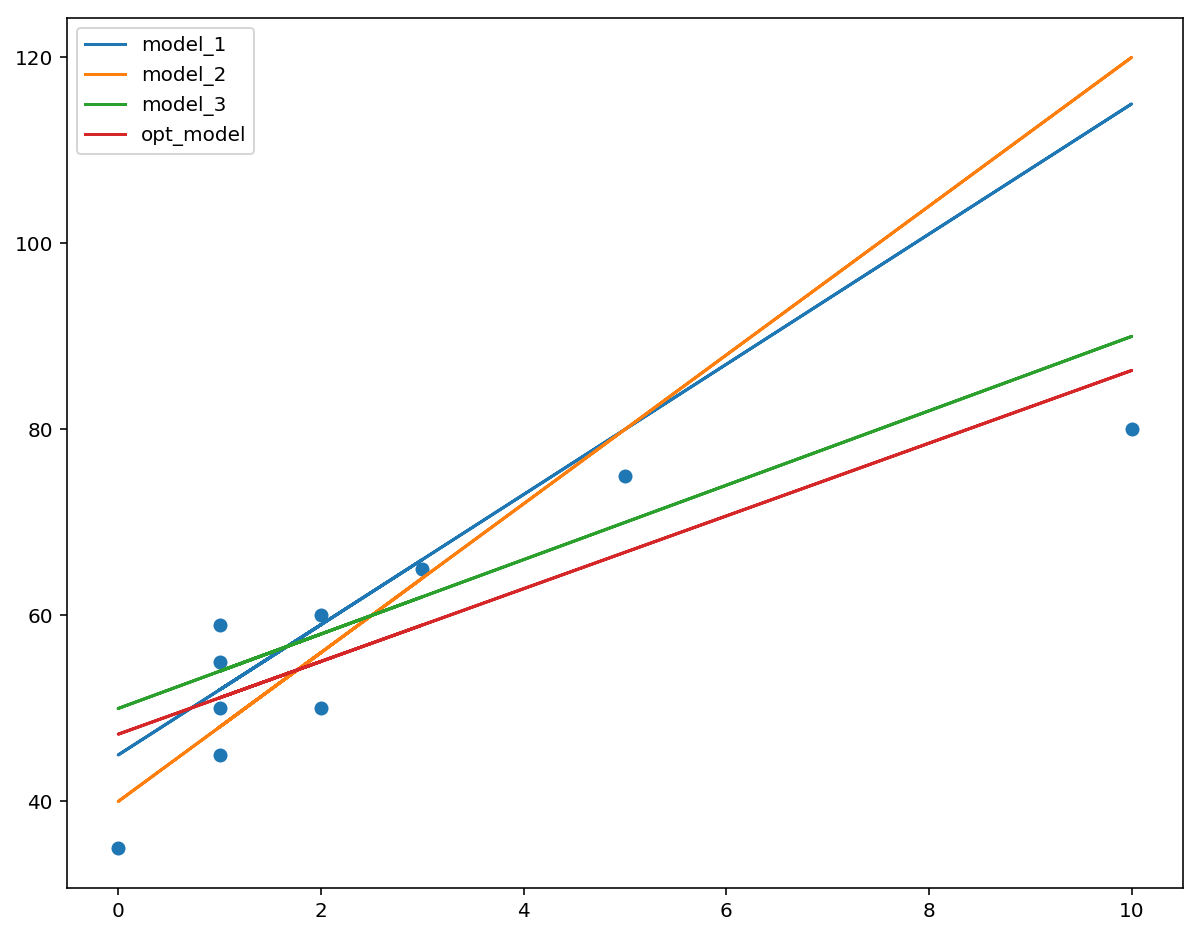

In [576]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], 50*np.ones(10) + X[:,1]*4, label='model_3')
plt.plot(X[:,1], W[0] + W[1] * X[:,1], label='opt_model')
plt.legend();

Оценка модели:

In [577]:
# метрики качества предыдущих моделей:
calc_mse(y, y_pred3)

55.0

In [578]:
calc_mae(y, y_pred3)

6.2

In [579]:
calc_r2(y, y_pred3)

0.6683550410033767

In [580]:
# прогноз модели с оптимальными параметрами:
y_pred4 = W[0] + W[1]*X[:,1]
y_pred4

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [581]:
calc_mse(y, y_pred4)

45.93749999999999

In [582]:
calc_mae(y, y_pred4)

6.182142857142858

In [583]:
calc_r2(y, y_pred4)

0.7230010853835022

**2. Градиентный спуск**  

Градиентный спуск - это итеративный алгоритм поиска весов признаков.  
Алгоритм обновляет веса с учетом градиента функции потерь:  
w = w − learning rate × error × X

In [584]:
W = np.array([0.01, 0.1])

In [585]:
y_pred = np.dot(X, W)
y_pred

array([0.11, 0.11, 0.21, 0.11, 0.31, 0.01, 0.51, 1.01, 0.11, 0.21])

In [586]:
calc_mse(y, y_pred)

3423.6233

In [587]:
lr = 0.01

In [588]:
grad_0 = (1/len(y))*lr*(2*np.sum(X[:,0]*(W[0]*X[:,0] - y)))
grad_1 = (1/len(y))*lr*(2*np.sum(X[:,1]*(W[1]*X[:,1] - y)))

In [589]:
W[0] = W[0] - grad_0; W[0]

1.1578

In [590]:
W[1] = W[1] - grad_1; W[1]

3.6688

In [591]:
y_pred = np.dot(X, W)
y_pred

array([ 4.8266,  4.8266,  8.4954,  4.8266, 12.1642,  1.1578, 19.5018,
       37.8458,  4.8266,  8.4954])

In [592]:
calc_mse(y, y_pred)

2227.5964155919996

### Домашнее задание:

1. Подберите скорость обучения (lr) и количество итераций (epoch):

In [593]:
n = X.shape[1]
epoch = 300
lr = 0.001
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.001)

In [594]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3173.15, веса: [1.551 2.2  ]
# итерация: 100, MSE: 414.5541707681393, веса: [21.1833847   8.72081594]
# итерация: 200, MSE: 175.90244862743472, веса: [31.7649089   6.76685736]


Значение epoch 345. Минимальное значение ошибки при lr = 0.01: 45.9375000000001


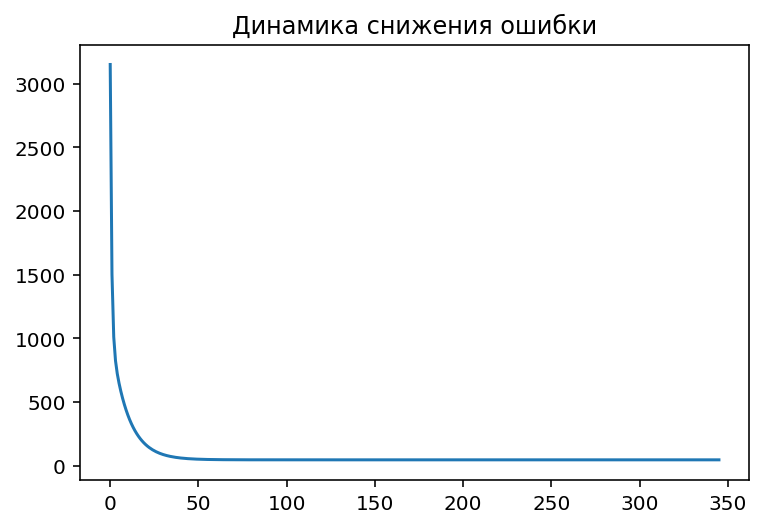

In [595]:
n = X.shape[1]
epoch = 100000
lr = 0.01
W = np.array([1, 0.5])
W, lr
err = 0
box = []
err_last = 999999

for i in range(epoch):      
    
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    y_pred = np.dot(X, W)
    
    err = calc_mse(y, y_pred)
    box.append(err)
    if err_last > err:
        err_last = err
#         print("err_last", err_last)
    else:
        print(f"Значение epoch {i}. Минимальное значение ошибки при lr = {lr}: {err}" )
        break

plt.plot(box) 
plt.title("Динамика снижения ошибки")
plt.show()
# Значение epoch 3237. Минимальное значение ошибки при lr = 0.001: 45.937500000002316

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [619]:
W

array([10.88372093, 10.38372093])

In [620]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


In [599]:
n = X.shape[1]
epoch = 500
lr = 0.01
W = np.array([1, 0.5])
W, lr
A = X[:, j]

for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    
    W -= (lr * (1/n * 2 * np.sum(A * (y_pred - y))))
    
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3173.15, веса: [18.  17.5]
# итерация: 100, MSE: 755.4079772850209, веса: [10.88372093 10.38372093]
# итерация: 200, MSE: 755.407977285019, веса: [10.88372093 10.38372093]
# итерация: 300, MSE: 755.407977285019, веса: [10.88372093 10.38372093]
# итерация: 400, MSE: 755.407977285019, веса: [10.88372093 10.38372093]


Итерация 184. Значение ошибки при lr = 0.001: 755.4079772850195


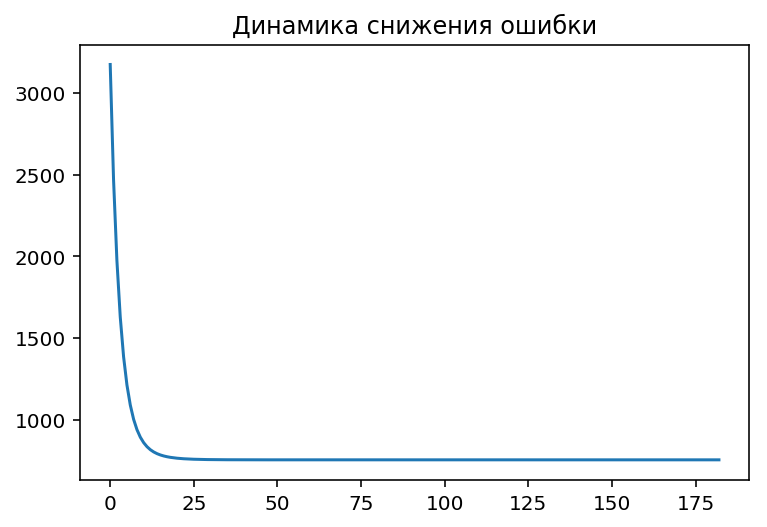

In [621]:
# Это задание недопонял
n = X.shape[1]
# epoch = 500
lr = 0.001
W = np.array([1, 0.5])
W, lr
A = X[:, j]

box = []
err_last = 999999
i = 1
x = True

while x == True: 
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#    print("err")
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    
    W -= (lr * (1/n * 2 * np.sum(A * (y_pred - y))))
    
    if i % 1000 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')
        
    x = err_last > err 
    i += 1
    box.append(err)
    err_last = err

print(f"Итерация {i}. Значение ошибки при lr = {lr}: {err}" )

plt.plot(box) 
plt.title("Динамика снижения ошибки")
plt.show()

Задание **3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [601]:
# Проверка условия

n = X.shape[1]
epoch = 100000
lr = 0.01
W = np.array([1, 0.5])
W, lr
err = 0

err_last = 999999

trashold = 0.0001

#while x == True: 
        
for i in range(epoch):     
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    y_pred = np.dot(X, W)

    err = calc_mse(y, y_pred)

    if err_last - err > trashold: # Проверка условия
        err_last = err
    #         print("err_last", err_last)
    else:
        print(f"Значение epoch {i}. Порог ошибки {trashold}. Значение ошибки при lr = {lr}: {err}" )
        break

Значение epoch 130. Порог ошибки 0.0001. Значение ошибки при lr = 0.01: 45.938379887287674


Порог ошибки 0.001. Значение ошибки при lr = 0.001: 46.03218329816916


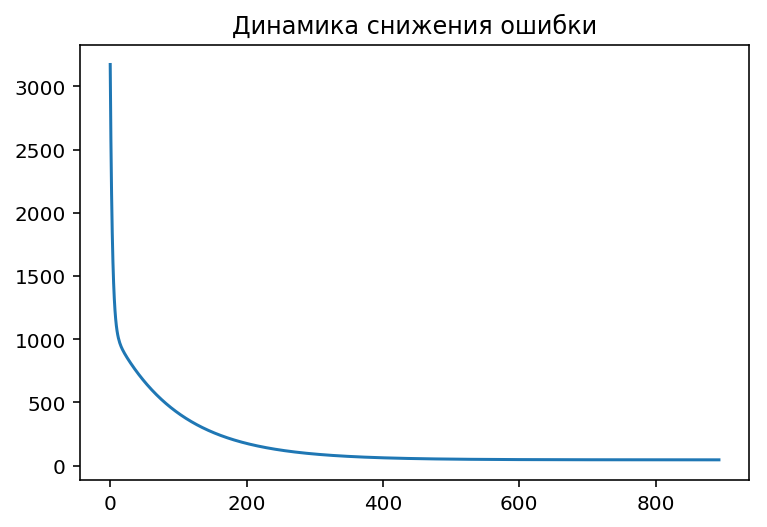

In [602]:
# Проверка условия без итераций по epoch
n = X.shape[1]
lr = 0.001
W = np.array([1, 0.5])
W, lr

err = 1
err_last = 999999999
box = []
trashold = 0.001

i = 1
x = True

while x == True: 
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))    
    y_pred = np.dot(X, W)
    
    err = calc_mse(y, y_pred)
    x = err_last - err > trashold 
    i += 1
    box.append(err)
    err_last = err

print(f"Порог ошибки {trashold}. Значение ошибки при lr = {lr}: {err}" )

plt.plot(box) 
plt.title("Динамика снижения ошибки")
plt.show()